<a href="https://colab.research.google.com/github/NataliaKhabibulina/Food_nutrition/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A5%D0%B0%D0%B1%D0%B8%D0%B1%D1%83%D0%BB%D0%B8%D0%BD%D0%B0_%D0%9D_%D0%B8%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [ ]:
# импортируем все требующиеся для решения библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import re
from pylab import rcParams
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from numpy import linalg
from scipy import stats as st

## Импорт датасета, первичная подготовка и очистка данных

In [ ]:
df = pd.read_csv('nutrition.csv')
df
# при взгляде на кусочек датафрейма видим проблемы: довольно странные "цифры" в ячейках, где подразумеваются цифровые данные
# а также обращает на себя внимание ряд пропущенных значений в колонке saturated_fat
# вывод - датасет нуждается в подготовке прежде чем с ним можно будет работать полноценно

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,6.422

In [ ]:
df.info()

# нормальным для работы с числами форматом int64 обладают только колонки Unnamed: 0, calories, lucopene, остальные данные представлены в формате object
# требуется перевести формат данных в числовой, при этом желательно и размерность значений не потерять

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [ ]:
df.astype(str).dtypes

# переведем данные с строковый формат, чтобы далее можно было удалить обозначения размерностей из колонок, оставив только цифры

Unnamed: 0      object
name            object
serving_size    object
calories        object
total_fat       object
                 ...  
alcohol         object
ash             object
caffeine        object
theobromine     object
water           object
Length: 77, dtype: object

In [ ]:
df['serving_size'] = df['serving_size'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['calories'] = df['calories'].astype(float)
df['total_fat'] = df['total_fat'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['saturated_fat'] = df['saturated_fat'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['cholesterol'] = df['cholesterol'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['sodium'] = df['sodium'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['choline'] = df['choline'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['folate'] = df['folate'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['folic_acid'] = df['folic_acid'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['niacin'] = df['niacin'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['pantothenic_acid'] = df['pantothenic_acid'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['riboflavin'] = df['riboflavin'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['thiamin'] = df['thiamin'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_a_rae'] = df['vitamin_a_rae'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['carotene_alpha'] = df['carotene_alpha'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['carotene_beta'] = df['carotene_beta'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['cryptoxanthin_beta'] = df['cryptoxanthin_beta'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['lutein_zeaxanthin'] = df['lutein_zeaxanthin'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_b12'] = df['vitamin_b12'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_b6'] = df['vitamin_b6'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_c'] = df['vitamin_c'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_d'] = df['vitamin_d'].str.replace('IU', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_e'] = df['vitamin_e'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['tocopherol_alpha'] = df['tocopherol_alpha'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['vitamin_k'] = df['vitamin_k'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['calcium'] = df['calcium'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['copper'] = df['copper'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['irom'] = df['irom'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['magnesium'] = df['magnesium'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['manganese'] = df['manganese'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['phosphorous'] = df['phosphorous'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['potassium'] = df['potassium'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['selenium'] = df['selenium'].str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['zink'] = df['zink'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['protein'] = df['protein'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['alanine'] = df['alanine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['arginine'] = df['arginine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['aspartic_acid'] = df['aspartic_acid'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['cystine'] = df['cystine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['glutamic_acid'] = df['glutamic_acid'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['glycine'] = df['glycine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['histidine'] = df['histidine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['hydroxyproline'] = df['hydroxyproline'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['isoleucine'] = df['isoleucine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['leucine'] = df['leucine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['lysine'] = df['lysine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['methionine'] = df['methionine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['phenylalanine'] = df['phenylalanine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['proline'] = df['proline'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['serine'] = df['serine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['threonine'] = df['threonine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['tryptophan'] = df['tryptophan'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['tyrosine'] = df['tyrosine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['valine'] = df['valine'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['carbohydrate'] = df['carbohydrate'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['fiber'] = df['fiber'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['sugars'] = df['sugars'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['fructose'] = df['fructose'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['galactose'] = df['galactose'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['glucose'] = df['glucose'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['lactose'] = df['lactose'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['maltose'] = df['maltose'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['sucrose'] = df['sucrose'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['fat'] = df['fat'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['saturated_fatty_acids'] = df['saturated_fatty_acids'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['monounsaturated_fatty_acids'] = df['monounsaturated_fatty_acids'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['polyunsaturated_fatty_acids'] = df['polyunsaturated_fatty_acids'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['fatty_acids_total_trans'] = df['fatty_acids_total_trans'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['alcohol'] = df['alcohol'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['ash'] = df['ash'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)
df['caffeine'] = df['caffeine'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['theobromine'] = df['theobromine'].str.replace('mg', '').str.replace('b', '').str.replace("'", '').astype(float)
df['water'] = df['water'].str.replace('g', '').str.replace('b', '').str.replace("'", '').astype(float)

# удалим из наших строк обозначения размерностей, и оставшую запись переведем в формат записи числа с плавающей точкой

In [ ]:
# df['vitamin_a'] = df['vitamin_a'].str.replace('IU', '').str.replace('b', '').str.replace("'", '').astype(float)
# основная масса значений в колонке, описывающей содержание витамина А, имеет размерность IU, но при попытке выполнения кода выше
# видим ошибку - помимо размерности IU встречается размерность mcg. Так что надо убрать оба варианта.
# Эту случайную mcg посчитаем как опечатку ввода данных

In [ ]:
df['vitamin_a'] = df['vitamin_a'].str.replace('IU', '').str.replace('mcg', '').str.replace('b', '').str.replace("'", '').astype(float)

# теперь все должно быть хорошо и все цифры - это цифры, а не цифра+размерность. 

In [ ]:
# переименуем колонки, вынеся размерности в шапку - их нельзя потерять, потому что в дальнейшем
# может потребоваться перевод из мг в г и т.д, а также исправим опечатки (irom, zink)

df.rename(columns={'name': 'product', 'calories': 'kilocal', 'serving_size': 'serving size, g', 'total_fat': 'total fat, g', 'saturated_fat': 'saturated fat, g', 'cholesterol': 'cholesterol, mg', 
                   'sodium': 'Na, mg', 'choline': 'choline, mg', 'folate': 'folate, mg', 'folic_acid': 'folic acid, mg', 'niacin': 'niacin, mg',
                   'pantothenic_acid': 'panthothenic acid, mg', 'riboflavin': 'riboflavin, mg', 'thiamin': 'thiamin, mg', 'vitamin_a': 'vitamin A, IU', 'vitamin_a_rae': 'vitamin A as retinol, mcg',
                   'carotene_alpha': 'carotene alpha, mcg', 'carotene_beta': 'carotene beta, mcg', 'cryptoxanthin_beta': 'cryptoxanthin beta, mcg', 'lutein_zeaxantin': 'lutein zeaxantin, mcg', 'lucopene': 'lycopene, mg',
                   'vitamin_b12': 'vitamin B12, mcg', 'vitamin_b6': 'vitamin B6, mg', 'vitamin_c': 'vitamin C, mg', 'vitamin_d': 'vitamin D, IU', 'vitamin_e': 'vitamin E, mg',
                   'tocopherol_alpha': 'tocopherol alpha, mg', 'vitamin_k': 'vitamin K, mcg', 'calcium': 'Ca, mg', 'copper': 'Cu, mg', 'irom': 'Fe, mg',
                   'magnesium': 'Mg, mg', 'manganese': 'Mn, mg', 'phosphorous': 'P, mg', 'potassium': 'K, mg', 'selenium': 'Se, mcg', 'zink': 'Zn, mg',
                   'protein': 'protein, g', 'alanine': 'alanine, g', 'argignine': 'argignine, g', 'aspartic_acid': 'aspartic acid, g', 'cystine': 'cystine, g',
                   'glutamic_acid': 'glutamic acid, g', 'glycine': 'glycine, g', 'histidine': 'hystidine, g', 'hydroxyproline': 'hydroxyproline, g', 'isoleucine': 'isoleucine, g',
                   'leucine': 'leucine, g', 'lysine': 'lysine, g', 'methionine': 'methionine, g', 'phenylalanine': 'phenylalanine, g', 'proline': 'proline, g',
                   'serine': 'serine, g', 'threonine': 'threonine, g', 'tryptophan': 'tryptophan, g', 'tyrosine': 'tyrosine, g', 'valine': 'valine, g',
                   'carbohydrate': 'carbohydrates, g', 'fiber': 'fiber, g', 'sugars': 'sugars, g', 'fructose': 'fructose, g', 'galactose': 'galactose, g',
                   'glucose': 'glucose, g', 'lactose': 'lactose, g', 'maltose': 'maltose, g', 'sucrose': 'sucrose, g', 'fat': 'fat, g',
                   'saturated_fatty_acids': 'SFAs, g', 'monounsaturated_fatty_acids': 'MUFAs, g', 'polyunsaturated_fatty_acids': 'PUFAs, g', 'fatty_acids_total_trans': 'trans FAs, mg', 'alcohol': 'alcohol, g',
                   'ash': 'ash, g', 'caffeine': 'caffeine, mg', 'theobromine': 'theobromine, mg', 'water': 'water, g'}, inplace=True)

In [ ]:
df.head(5)

# посмотрим на исправленный датасет

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"lycopene, mg","vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
0,0,Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0,0.00,0.210,1.1,0.0,1.40,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0,0.00,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100.0,367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0,0.00,0.482,0.0,0.0,0.08,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0,0.13,0.023,2.3,0.0,0.01,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


# Исследовательский анализ данных

In [ ]:
df.describe()

# в столбце с содержанием ликопина одни нули - удалим.
# остальные значения укладываются в рамки нашего представления о продуктах - размер порции 100 г, нет значений по какому-то веществу, 
# которые превышали бы размер порции
# и посмотрим на продукты с экстримальными значениями - очень высокими или очень низкими и попробуем понять, все ли в рамках здравого смысла

,Unnamed: 0,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"lycopene, mg","vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
count,8789.000000,8789.0,8789.000000,8789.000000,7199.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.0,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,4394.000000,100.0,226.283878,10.556855,4.192791,38.723063,306.353851,23.681249,44.085561,17.638639,3.400145,0.484268,0.235364,0.207929,676.320514,92.224713,19.829105,141.716236,6.665150,120.682216,0.0,1.201716,0.261324,8.356548,14.560815,0.885576,0.885576,9.296268,73.317328,0.167482,2.645764,32.262032,0.495872,153.844123,265.251223,12.478280,1.939745,11.345616,0.486991,0.564506,0.768497,0.104868,1.459090,0.445260,0.270972,0.025559,0.393758,0.695874,0.687565,0.217307,0.368084,0.449345,0.369037,0.362793,0.095344,0.297900,0.438582,22.121915,2.040073,6.756293,0.267262,0.004852,0.290416,0.132518,0.071506,0.577029,10.550794,3.434146,3.772313,2.114332,38.723063,0.117522,1.717408,2.608829,4.695642,54.112074
std,2537.310091,0.0,169.862001,15.818247,6.877009,117.358944,939.220468,51.332265,127.670410,100.736270,4.765302,1.251570,0.441263,0.510359,3694.739553,771.522157,255.221351,1030.755350,123.187897,911.196267,0.0,4.271908,0.467713,65.624854,123.643892,3.813260,3.813260,62.128752,199.850425,0.543426,5.661046,55.837795,6.301953,202.198353,371.443524,27.072684,3.335766,10.530602,0.659244,0.775294,1.044862,0.140665,1.818475,0.678858,0.366762,0.077800,0.515112,0.896937,0.950281,0.296446,0.471174,0.599768,0.478534,0.476645,0.127419,0.392489,0.566133,27.266261,4.269181,13.718890,1.566965,0.078666,1.701835,1.844355,0.439321,3.952760,15.814870,6.426586,6.826234,5.050045,117.358944,1.600127,2.967751,82.070233,60.962608,30.772999
min,0.000000,100.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
del df['lycopene, mg']

In [ ]:
df.loc[df['kilocal'] == 0]

# начнем с рассмотрения продуктов, имеющих нулевую калорийность
# таких значений 39 штук. Большинство на вид не вызывают подозрений - это вода или специи. Однако, есть пара подозрительных позиций

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
619,619,"Salt, table",100.0,0.0,0.0,NaN,0.0,38758.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,24.0,0.030,0.33,1.0,0.100,0.0,8.0,0.1,0.10,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,99.80,0.0,0.0,0.20
772,772,"Leavening agents, baking soda",100.0,0.0,0.0,NaN,0.0,27360.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.2,0.00,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,36.90,0.0,0.0,0.20
888,888,"Beverages, well, tap, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.10,0.0,0.0,99.90
1240,1240,"Water, generic, bottled",100.0,0.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,10.0,0.007,0.00,2.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.07,0.0,0.0,99.98
1311,1311,"Beverages, cola, ZEVIA",100.0,0.0,0.0,NaN,0.0,6.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.13,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.00,13.0,0.0,98.36
1488,1488,"Beverages, PERRIER, bottled, water",100.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,14.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.10,0.0,0.0,99.90
1726,1726,"Beverages, municipal, tap, water",100.0,0.0,0.0,NaN,0.0,3.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,3.0,0.009,0.00,1.0,0.000,0.0,1.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.10,0.0,0.0,99.90
1753,1753,"Beverages, club soda, carbonated",100.0,0.0,0.0,NaN,0.0,21.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0

In [ ]:
df.loc[(df['kilocal'] == 0) & (df['carbohydrates, g'] != 0)]

# строго говоря, калорийность не может быть нулевой, если ненулевые значения по основным питательным веществам (жирам, углеводом, белкам)
# калорийность продуктов в этом выводе, если придираться, не совсем корректно посчитана: они содержат 0,03-1,13г углеводов, которые по идее должны пересчитываться
# в калорийность по уравнению 1г углеводов = 4,1ккал. При самом большом значении это будет 4,63 килокалории, чем в целом можно пренебречь
# но остается порошок стевии, который полностью состоит из углеводов, однако, это гликозиды, которые имеют очень низкую калорийность
# по литературным данным, калорийность порошка стевии около 18 ккал/100 г.  
# для целей настоящей работы такими неточностями можно пренебречь, но по-хорошему стоит проверить источники данных, использованные для сборки датасета

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
1311,1311,"Beverages, cola, ZEVIA",100.0,0.0,0.0,NaN,0.0,6.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,13.0,0.0,98.36
2320,2320,"Beverages, Mixed Berry, Zero, POWERADE",100.0,0.0,0.0,NaN,0.0,42.0,0.0,0.0,0.0,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,10.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,0.0,99.35
2367,2367,"Beverages, caffeine free, cola, ZEVIA",100.0,0.0,0.0,NaN,0.0,6.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,98.87
4744,4744,"Sweetener, herbal extract powder from Stevia leaf",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
4805,4805,"Beverages, diet, decaffeinated, ready to drink...",100.0,0.0,0.0,NaN,0.0,4.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,11.0,0.008,0.00,2.0,0.000,4.0,27.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,99.14
6768,6768,"Beverages, DANNON Fluoride To Go, non-carbonat...",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,99.97
7495,7495,"Beverages, contains caffeine, with sodium sacc...",100.0,0.0,0.0,NaN,0.0,16.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,4.0,0.013,0.02,1.0,0.009,11.0,4.0,0.1,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,11.0,0.0,99.80
8694,8694,"Carbonated beverage, without caffeine, with so...",100.0,0.0,0.0,NaN,0.0,16.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,4.0,0.025,0.04,1.0,0.017,0.0,2.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df.loc[df['water, g'] == 0]

# некоторые подозрения вызывают также продукты, не содержащие воду - обычно она есть в продуктах
# по выборке получается, что это масла и продукты на основе масел

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
67,67,"Oil, soybean lecithin",100.0,763.0,100.0,15.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.18,8.18,183.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,15.005,10.977,45.318,0.0,0.0,0.0,0.0,0.0,0.0
192,192,"Oil, corn and canola",100.0,884.0,100.0,8.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.84,14.84,42.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,8.026,58.537,29.113,0.0,0.0,0.0,0.0,0.0,0.0
212,212,"Oil, ucuhuba butter",100.0,884.0,100.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,85.200,6.700,2.900,0.0,0.0,0.0,0.0,0.0,0.0
223,223,"Oil, apricot kernel",100.0,884.0,100.0,6.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,6.300,60.000,29.300,0.0,0.0,0.0,0.0,0.0,0.0
256,256,"Fish oil, cod liver",100.0,902.0,100.0,23.0,570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,22.608,46.711,22.541,570.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7774,7774,"Oil, woks and light frying, principal uses sal...",100.0,884.0,100.0,7.6,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.10,17.10,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,7.615,62.093,25.588,0.0,0.0,0.0,0.0,0.0,0.0
7808,7808,"Shortening, soybean (partially hydrogenated)-c...",100.0,884.0,100.0,25.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.13,6.13,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,25.000,44.500,26.100,0.0,0.0,0.0,0.0,0.0,0.0
7969,7969,"Oil, principal uses icings and fillings, palm,...",100.0,884.0,100.0,28.0,0.0,0.0

In [ ]:
df[df['saturated fat, g'].isnull()]

# у нас есть пропуски в колонке с насыщенными жирами

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
0,0,Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
2,2,"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.0,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
10,10,"PACE, Picante Sauce",100.0,25.0,0.0,NaN,0.0,781.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,313.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.25,3.1,6.25,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0,0.0,3.85,0.0,0.0,89.90
11,11,"Goji berries, dried",100.0,349.0,0.4,NaN,0.0,298.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,26822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,48.4,0.0,0.00,0.00,0.0,190.0,0.000,6.80,0.0,0.000,0.0,0.0,0.0,0.00,14.26,0.698,0.722,1.711,0.144,1.431,0.304,0.157,0.0,0.261,0.456,0.233,0.087,0.271,1.000,0.498,0.358,0.000,0.222,0.316,77.06,13.0,45.61,0.00,0.0,0.00,0.0,0.00,0.00,0.39,0.000,0.000,0.000,0.0,0.0,0.78,0.0,0.0,7.50
12,12,"Mango nectar, canned",100.0,51.0,0.1,NaN,0.0,5.0,1.5,7.0,0.0,0.080,0.070,0.003,0.003,692.0,35.0,0.0,402.0,26.0,0.0,0.0,0.015,15.2,0.0,0.21,0.21,0.8,17.0,0.015,0.36,3.0,0.028,2.0,24.0,0.4,0.02,0.11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,13.12,0.3,12.45,5.56,0.0,5.31,0.0,0.56,1.02,0.06,0.014,0.022,0.011,0.0,0.0,0.08,0.0,0.0,86.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,8655,"Beverages, prepared with water, frozen concent...",100.0,45.0,0.0,NaN,0.0,10.0,0.0,0.0,0.0,0.253,0.189,1.042,0.105,6.0,0.0,0.0,3.0,0.0,0.0,0.0,0.071,55.1,0.0,0.02,0.02,0.0,118.0,0.100,0.08,11.0,0.014,33.0,167.0,0.0,0.04,0.12,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.32,0.0,11.05,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.001,0.001,0.001,0.0,0.0,0.48,0.0,0.0,88.08
8662,8662,"Apple juice, diluted with 3 volume water witho...",100.0,47.0,0.1,NaN,0.0,7.0,1.8,0.0,0.0,0.038,0.063,0.015,0.003,0.0,0.0,0.0,0.0,0.0,16.0,

In [ ]:
df[['saturated fat, g', 'SFAs, g']]

# в целом содержание насыщенных жиров близко к сумме насыщенных жирных кислот, что вообще-то логично)
# поэтому для недостающих значений saturated fat посдставим соотвествующее значение SFAs

,"saturated fat, g","SFAs, g"
0,NaN,0.009
1,6.2,6.180
2,NaN,0.034
3,0.4,0.449
4,1.2,1.160
...,...,...
8784,1.4,1.353
8785,3.9,3.860
8786,12.0,11.570
8787,1.1,1.086


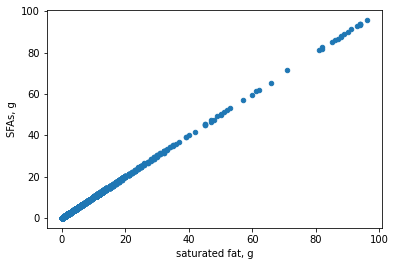

In [ ]:
df.plot(kind='scatter', x='saturated fat, g', y='SFAs, g')

# вообще все было видно и из таблицы выше, но для наглядности пусть будет и график, и коэффициет корреляции

In [ ]:
df[['saturated fat, g', 'SFAs, g']].corr()

,"saturated fat, g","SFAs, g"
"saturated fat, g",1.000000,0.999905
"SFAs, g",0.999905,1.000000


In [ ]:
df['saturated fat, g'].fillna(df['SFAs, g'], inplace=True)

In [ ]:
df['product'] = df['product'].str.replace(r'[^\w\s]+', '')

# уберем также знаки препинания из колонки с названием продуктов для удобства поиска

In [ ]:
df.info()

# теперь у нас нигде нет пропусков, значения в нужных форматах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8789 non-null   int64  
 1   product                    8789 non-null   object 
 2   serving size, g            8789 non-null   float64
 3   kilocal                    8789 non-null   float64
 4   total fat, g               8789 non-null   float64
 5   saturated fat, g           8789 non-null   float64
 6   cholesterol, mg            8789 non-null   float64
 7   Na, mg                     8789 non-null   float64
 8   choline, mg                8789 non-null   float64
 9   folate, mg                 8789 non-null   float64
 10  folic acid, mg             8789 non-null   float64
 11  niacin, mg                 8789 non-null   float64
 12  panthothenic acid, mg      8789 non-null   float64
 13  riboflavin, mg             8789 non-null   float

In [ ]:
#увеличим дефолтный размер графиков

rcParams['figure.figsize'] = 11,5

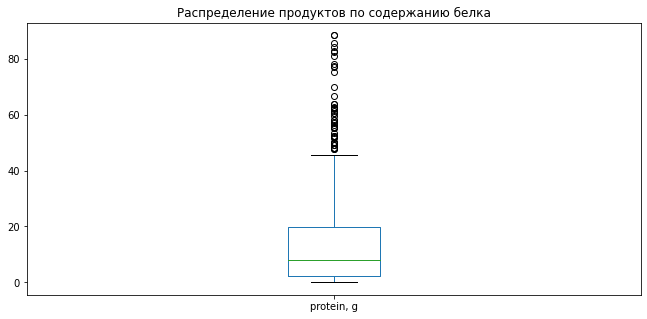

In [ ]:
df['protein, g'].plot(kind='box', title='Распределение продуктов по содержанию белка', grid=False)

# как ранее было видно из таблицы со статистиками, ни одно значение не превышает цифру в 100 г, а так как порция составляет 100г - то она может быть полностью белковой, противоречия нет

In [ ]:
df[(df['protein, g'] > 60)]

# посмотрим на наиболее белковые продукты. 

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
213,213,Soy protein isolate,100.0,335.0,3.4,0.4,0.0,1005.0,190.9,176.0,0.0,1.438,0.060,0.100,0.176,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.100,0.0,0.0,0.00,0.00,0.0,178.0,1.599,14.50,39.0,1.493,776.0,81.0,0.8,4.03,88.32,3.589,6.670,10.203,1.046,17.452,3.603,2.303,0.0,4.253,6.783,5.327,1.130,4.593,4.960,4.593,3.137,1.116,3.222,4.098,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.39,0.422,0.645,1.648,0.0,0.0,3.58,0.0,0.0,4.98
326,326,Vital wheat gluten,100.0,370.0,1.9,0.3,0.0,29.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,142.0,0.182,5.20,25.0,0.000,260.0,100.0,39.7,0.85,75.16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,13.79,0.6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.85,0.272,0.156,0.810,0.0,0.0,1.00,0.0,0.0,8.20
389,389,Egg dried white,100.0,382.0,0.0,0.0,0.0,1280.0,8.4,18.0,0.0,0.865,0.775,2.530,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.036,0.0,0.0,0.00,0.00,0.0,62.0,0.114,0.15,88.0,0.007,111.0,1125.0,125.1,0.10,81.10,4.684,4.412,8.253,2.102,10.770,2.842,1.830,0.0,4.581,6.838,5.515,2.790,4.736,3.153,5.593,3.685,0.999,3.153,5.164,7.80,0.0,5.40,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,5.30,0.0,0.0,5.80
1087,1087,Snacks plain pork skins,100.0,544.0,31.0,11.0,95.0,1818.0,164.5,0.0,0.0,1.549,0.430,0.283,0.099,40.0,12.0,0.0,0.0,0.0,0.0,0.64,0.023,0.5,0.0,0.53,0.53,0.0,30.0,0.094,0.88,11.0,0.069,85.0,127.0,41.0,0.56,61.30,5.811,4.841,4.469,0.529,7.625,11.917,0.725,0.0,1.382,3.322,2.783,0.480,1.940,7.262,2.597,1.823,0.118,1.205,2.421,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,31.30,11.370,14.780,3.640,95.0,0.0,5.40,0.0,0.0,1.80
1378,1378,Soy protein isolate potassium type,100.0,321.0,0.5,0.1,0.0,50.0,190.9,176.0,0.0,1.438,0.060,0.100,0.176,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.100,0.0,0.0,0.00,0.00,0.0,178.0,1.599,14.50,39.0,1.493,776.0,1590.0,0.8,4.03,88.32,3.589,6.670,10.203,1.046,17.452,3.603,2.303,0.0,4.253,6.783,5.327,1.130,4.593,4.960,4.593,3.137,1.116,3.222,4.098,2.59,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.53,0.077,0.117,0.299,0.0,0.0,3.58,0.0,0.0,4.98
1618,1618,Gelatins unsweetened dry powder,100.0,335.0,0.1,0.1,0.0,196.0,38.5,30.0,0.0,0.085,0.125,0.230,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.007,0.0,0.0,0.00,0.00,0.0,55.0,2.161,1.11,22.0,0.105,39.0,16.0,39.5,0.14,85.60,8.009,6.616,5.265,0.000,8.753,19.049,0.662,0.0,1.158,2.454,3.460,0.606,1.737,12.295,2.605,1.475,0.000,0.303,2.081,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.070,0.060,0.010,0.0,0.0,1.30,0.0,0.0,13.00
2267,2267,Fish dried Alaska Native whitefish,100.0,371.0,13.0,2.9,266.0,200.0,205.6,11.0,0.0,11.200,2.570,0.438,0.053,131.0,39.0,0.0,0.0,0.0,0.0,18.40,0.365,0.0,0.0,0.66,0.66,1.3,810.0,0.180,4.10,85.0,0.230,1040.0,1080.0,113.0,5.00,62.44,3.780,3.610,5.670,0.500,8.100,4.370,1.300,0.0,2.260,4.110,4.770,1.740,2.340,2.980,2.340,2.470,0.580,1.740,2.610,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,13.44,2.850,4.380,2.160

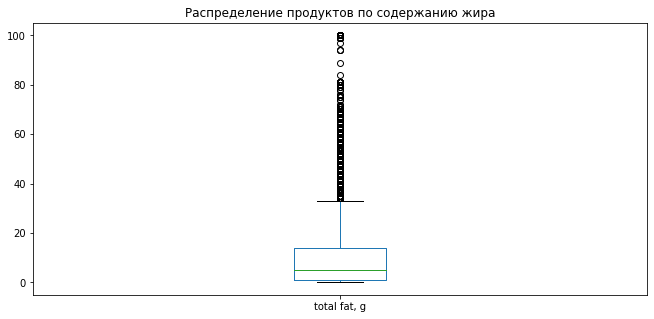

In [ ]:
df['total fat, g'].plot(kind='box', title='Распределение продуктов по содержанию жира', grid=False)

# ни одно значение, так же как с белком, не превышает значения в 100г

In [ ]:
df[(df['total fat, g'] == 100)].value_counts()

# довольно много продуктов из чистого жира, это жиры и масла животного и растительного происхождения

Unnamed: 0  product                                                                                       serving size, g  kilocal  total fat, g  saturated fat, g  cholesterol, mg  Na, mg  choline, mg  folate, mg  folic acid, mg  niacin, mg  panthothenic acid, mg  riboflavin, mg  thiamin, mg  vitamin A, IU  vitamin A as retinol, mcg  carotene alpha, mcg  carotene beta, mcg  cryptoxanthin beta, mcg  lutein_zeaxanthin  vitamin B12, mcg  vitamin B6, mg  vitamin C, mg  vitamin D, IU  vitamin E, mg  tocopherol alpha, mg  vitamin K, mcg  Ca, mg  Cu, mg  Fe, mg  Mg, mg  Mn, mg  P, mg  K, mg  Se, mcg  Zn, mg  protein, g  alanine, g  arginine  aspartic acid, g  cystine, g  glutamic acid, g  glycine, g  hystidine, g  hydroxyproline, g  isoleucine, g  leucine, g  lysine, g  methionine, g  phenylalanine, g  proline, g  serine, g  threonine, g  tryptophan, g  tyrosine, g  valine, g  carbohydrates, g  fiber, g  sugars, g  fructose, g  galactose, g  glucose, g  lactose, g  maltose, g  sucrose, g  fat

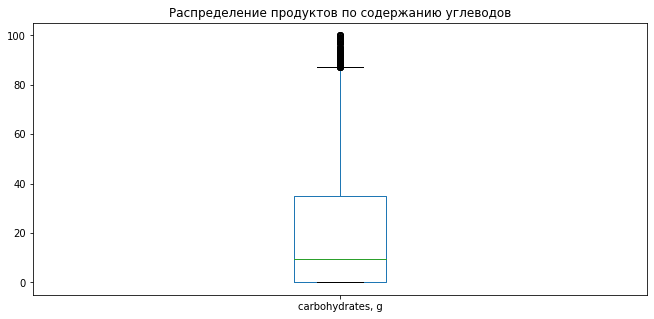

In [ ]:
df['carbohydrates, g'].plot(kind='box', title='Распределение продуктов по содержанию углеводов', grid=False)

# ни одно значение, так же как с белком и жиром, не превышает значения в 100г

In [ ]:
df[(df['carbohydrates, g'] > 90)]

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
0,0,Cornstarch,100.0,381.0,0.1,0.009,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
28,28,Chewing gum sugarless,100.0,268.0,0.4,0.100,0.0,7.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,20.0,0.000,0.00,0.0,0.000,0.0,0.0,0.5,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,94.80,2.4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.058,0.093,0.232,0.0,0.0,1.30,0.0,0.0,3.50
117,117,Candies butterscotch,100.0,391.0,3.3,2.100,9.0,391.0,0.8,0.0,0.0,0.002,0.004,0.016,0.012,100.0,28.0,0.0,6.0,0.0,0.0,0.0,0.000,0.0,0.0,0.09,0.09,0.3,4.0,0.001,0.01,0.0,0.001,1.0,3.0,0.6,0.09,0.03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,90.40,0.0,80.46,0.0,0.0,0.0,0.0,0.0,0.0,3.30,2.065,0.845,0.122,9.0,0.0,1.01,0.0,0.0,5.25
211,211,Candies jellybeans,100.0,375.0,0.1,0.000,0.0,50.0,0.0,0.0,0.0,0.008,0.009,0.011,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.00,0.00,0.0,3.0,0.028,0.13,2.0,0.035,4.0,37.0,1.1,0.05,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,93.55,0.2,70.00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.000,0.000,0.000,0.0,0.0,0.10,0.0,0.0,6.30
328,328,Sugars granulated,100.0,387.0,0.0,0.000,0.0,1.0,0.0,0.0,0.0,0.000,0.000,0.019,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,1.0,0.007,0.05,0.0,0.004,0.0,2.0,0.6,0.01,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,99.98,0.0,99.80,0.0,0.0,0.0,0.0,0.0,99.8,0.00,0.000,0.000,0.000,0.0,0.0,0.01,0.0,0.0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,6700,Candies SKITTLES Wild Berry Bite Size Candies ...,100.0,402.0,4.3,4.100,0.0,15.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,67.1,0.0,0.00,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.19,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,90.76,0.0,75.92,0.0,0.0,0.0,0.0,0.0,0.0,4.25,4.115,0.000,0.000,0.0,0.0,0.97,0.0,0.0,3.83
7045,7045,Beverages with added nutrients powder chocolat...,100.0,400.0,2.3,2.300,0.0,136.0,3.3,4.0,0.0,0.199,0.000,0.056,0.009,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909,27.3,0.0,0.04,0.04,0.9,

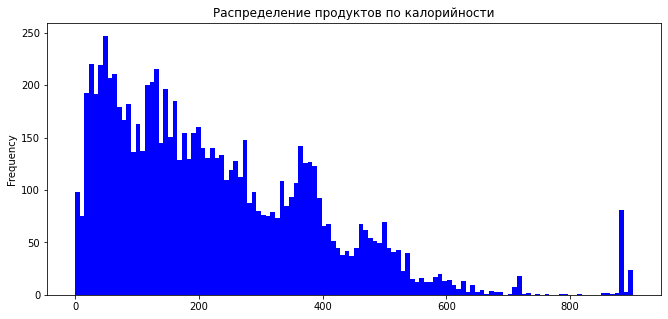

In [ ]:
df['kilocal'].plot(kind='hist', 
                  title='Распределение продуктов по калорийности', 
                  bins=120, 
                  color = 'blue')

# визуально, бОльшая часть продуктов имеет калорийность в пределах от 0 до 400.
# но есть и группа очень калорийных продуктов, где значение калорийности достигает 850-900 ккал/100г

In [ ]:
df[(df['kilocal'] > 850)]

# ожидаемо, в группу наиболее калорийных продуктов попадают масла и жиры

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
48,48,Butter oil anhydrous,100.0,876.0,99.0,62.0,256.0,2.0,22.3,0.0,0.0,0.003,0.01,0.005,0.001,3069.0,840.0,0.0,193.0,0.0,0.0,0.01,0.001,0.0,0.0,2.80,2.80,8.6,4.0,0.001,0.00,0.0,0.0,3.0,5.0,0.0,0.01,0.28,0.01,0.01,0.021,0.003,0.059,0.006,0.008,0.0,0.017,0.027,0.022,0.007,0.014,0.027,0.015,0.013,0.004,0.014,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.48,61.924,28.732,3.694,256.0,0.0,0.00,0.0,0.0,0.24
192,192,Oil corn and canola,100.0,884.0,100.0,8.0,0.0,0.0,0.2,0.0,0.0,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,14.84,14.84,42.2,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,8.026,58.537,29.113,0.0,0.0,0.00,0.0,0.0,0.00
212,212,Oil ucuhuba butter,100.0,884.0,100.0,85.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.60,0.60,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,85.200,6.700,2.900,0.0,0.0,0.00,0.0,0.0,0.00
223,223,Oil apricot kernel,100.0,884.0,100.0,6.3,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,4.00,4.00,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,6.300,60.000,29.300,0.0,0.0,0.00,0.0,0.0,0.00
256,256,Fish oil cod liver,100.0,902.0,100.0,23.0,570.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,100000.0,30000.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,10000.0,0.00,0.00,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,22.608,46.711,22.541,570.0,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,7993,Oil pourable clear fry soy partially hydrogena...,100.0,884.0,100.0,15.0,0.0,0.0,0.2,0.0,0.0,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,8.10,8.10,24.7,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,15.341,34.630,45.228,0.0,0.0,0.00,0.0,0.0,0.00
7994,7994,Oil uses similar to high quality cocoa butter ...,100.0,884.0,100.0,88.0,0.0,6.0,0.2,0.0,0.0,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,3.8

## Изучение закономерностей в данных


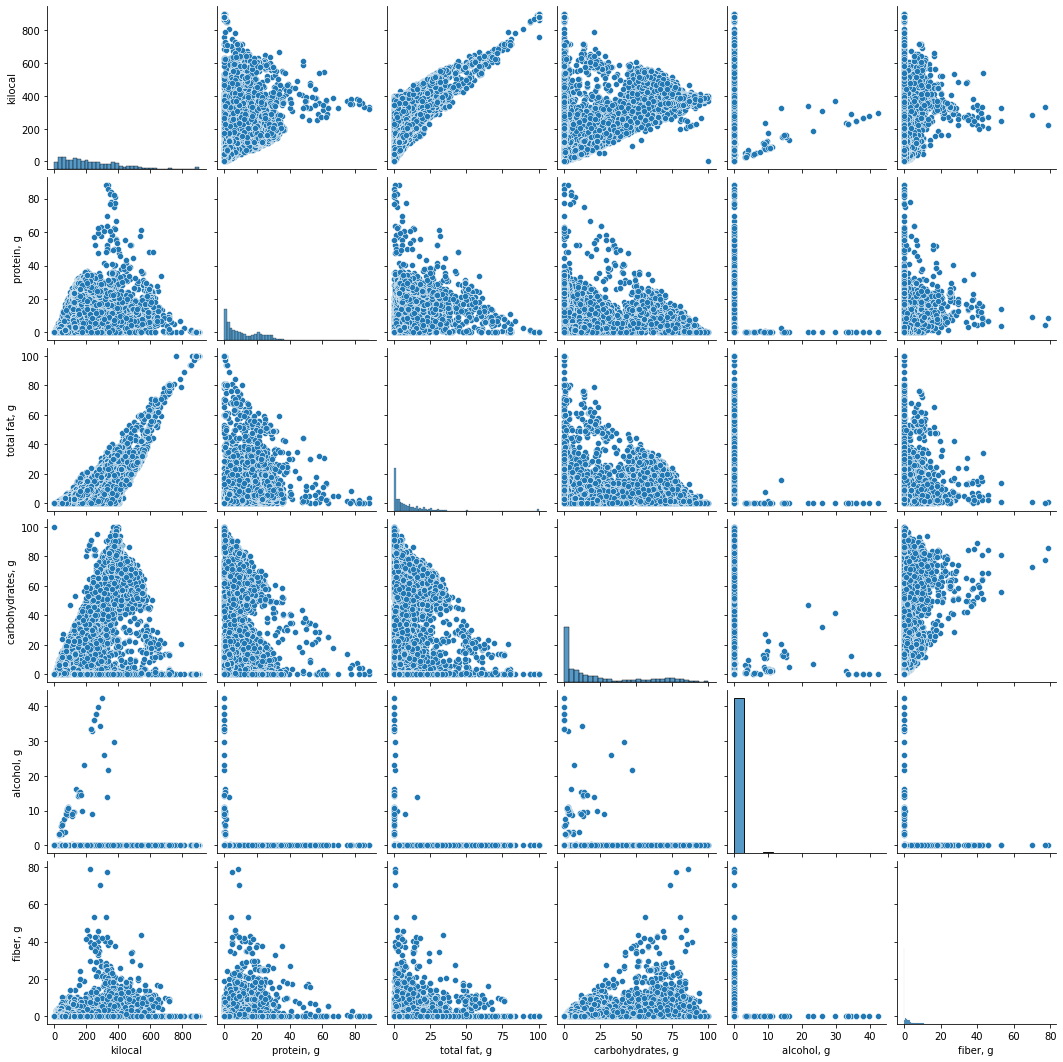

In [ ]:
sns.pairplot(df[['kilocal', 'protein, g', 'total fat, g', 'carbohydrates, g', 'alcohol, g', 'fiber, g']])

# посмотрим на зависимость калорийности от содержания белка, жира, углеводов, спирта и клетчатки
# видна корреляция между калорийностью и жиром с углеводами

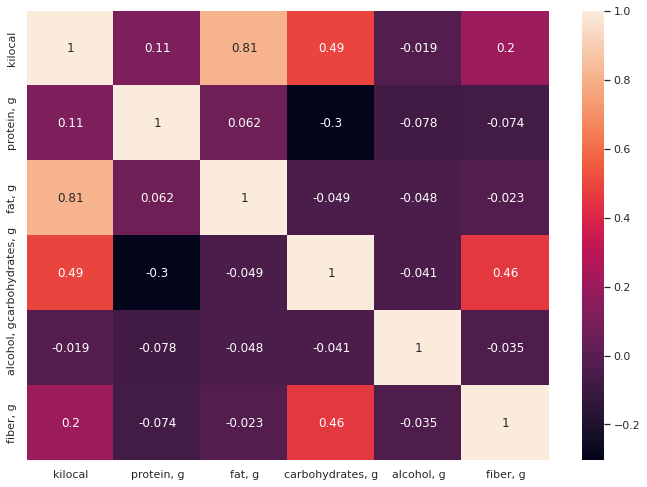

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df[['kilocal', 'protein, g', 'fat, g', 'carbohydrates, g', 'alcohol, g', 'fiber, g']].corr(), annot=True)

# построим тепловую карту с коэффициентами корреляции

## Модель линейной регрессии для расчета калорийности

In [ ]:
X = df[['protein, g', 'fat, g', 'carbohydrates, g', 'alcohol, g', 'fiber, g']]
y = df['kilocal']

# разеделим выборку на тренировочную и тестовую, построим модель, посчитаем ошибку модели

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([ 4.12432088,  8.83840985,  3.95812153,  6.816584  , -1.99054083])

In [ ]:
model.intercept_

1.8030397266853413

In [ ]:
# y = 4.12*protein + 8.84*fat + 3.96*carbohydrates + 6.82*alcohol - 1.99*fiber + 1.80
# знание коэффициентов модели при каждой переменной, а также свободного члена уравнения, позволяет нам написать математическую форму уравнения зависимости

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([143.10926566, 414.28791708,  44.91172905, ..., 373.29024154,
       304.88352005,  31.38083906])

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.9961391347638313

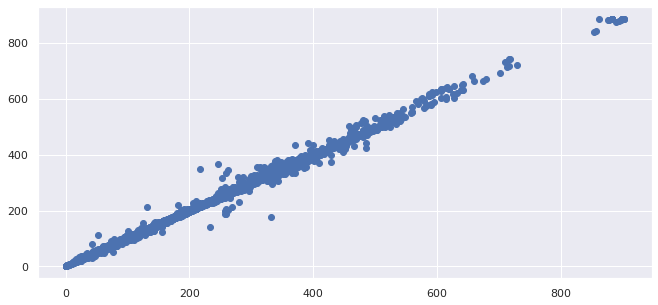

In [ ]:
plt.scatter(y_test, y_pred)  # если строить модель без учета содержания клетчатки и алкоголя, разброс точек более значительный

In [ ]:
train_predictions = model.predict(X_train) 
test_predictions = model.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

# без учета в построении модели содержания клетчатки и алкоголя было около 300, то есть добавление этих переменных в модель увеличивает ее точность

Train MSE: 136.56161227351882
Test MSE: 112.02445413412153


## Кластеризация состава жиров

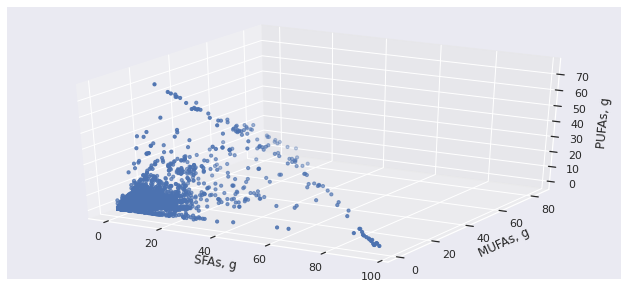

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('SFAs, g')
ax.set_ylabel('MUFAs, g')
ax.set_zlabel('PUFAs, g')
ax.scatter(df['SFAs, g'], df['MUFAs, g'], df['PUFAs, g'], s=10, depthshade = True)

# жирные кислоты представлены в датасете тремя типами - насыщенными, мононенасыщенными и полиненасыщенными

In [ ]:
df_fats = df[['SFAs, g', 'MUFAs, g', 'PUFAs, g']]

# вынесем в отдельный датасет нужные нам данные

In [ ]:
# строим график локтя для нахождения числа кластеров

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_fats)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

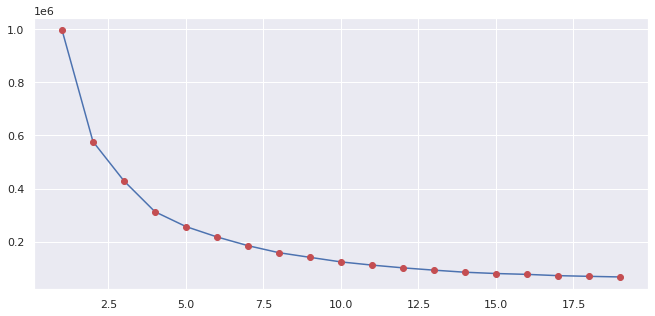

In [ ]:
# по графику оптимальное число кластеров - 4, так как затем наклон кривой меняется уже незначительно
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
# явно указываем количество кластеров, полученное из графика локтя
kmeans = KMeans(init='k-means++', n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(df_fats)
clusters

array([0, 2, 0, ..., 1, 0, 0], dtype=int32)

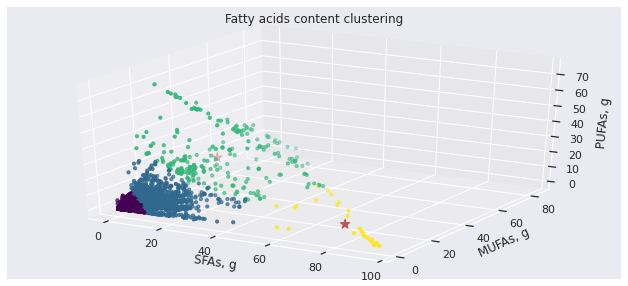

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('SFAs, g')
ax.set_ylabel('MUFAs, g')
ax.set_zlabel('PUFAs, g')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
           s = 100, c = 'r', marker='*', label = 'Centroid')
ax.scatter(df_fats['SFAs, g'], df_fats['MUFAs, g'], df_fats['PUFAs, g'], s=10, depthshade = True, c=clusters, cmap='viridis')
ax.set_title("Fatty acids content clustering")
ax.dist = 10

plt.autoscale(enable=True, axis='x', tight=True)

# на график также добавлены рассчитанные центры кластеров
# для лучшей видимости также еще посмотрим на плоские графики

Text(0.5, 1.0, 'Моно и полиненасыщенные')

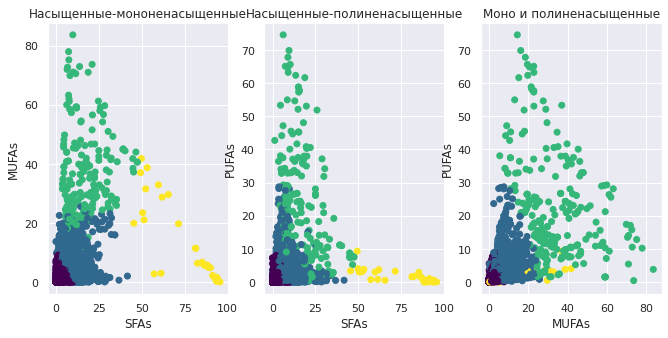

In [ ]:
plt.subplot (1, 3, 1)
plt.scatter(df_fats['SFAs, g'], df_fats['MUFAs, g'], c=clusters, cmap='viridis')
plt.xlabel('SFAs')
plt.ylabel('MUFAs')
plt.title('Насыщенные-мононенасыщенные')

plt.subplot (1, 3, 2)
plt.scatter(df_fats['SFAs, g'], df_fats['PUFAs, g'], c=clusters, cmap='viridis')
plt.xlabel('SFAs')
plt.ylabel('PUFAs')
plt.title('Насыщенные-полиненасыщенные')

plt.subplot (1, 3, 3)
plt.scatter(df_fats['MUFAs, g'], df_fats['PUFAs, g'], c=clusters, cmap='viridis')
plt.xlabel('MUFAs')
plt.ylabel('PUFAs')
plt.title('Моно и полиненасыщенные')

# видим разграничение по следующим кластерам:
# фиолет - до 10 г насыщенных, мононенасыщенных и полиненасыщенных (продукты с низким содержанием жирных кислот в целом)
# желтый - до 40 насыщенных, 20 мононенасыщенных, 30 полиненасыщенных (продукты со средним содержанием жирных кислот без существенного преобладания одной их фракций)
# синий - не более 40 г насыщенных, при этом более 20 мононенасыщенных и в основном более 10 полиненасыщенных (продукты с преобладанием ненасыщенных жирных  кислот)
# зеленый - более 40 насыщенных, не более 40 мононенасыщенных, не более 10 полиненасыщенных (продукты с высоким содержанием насыщенных жирных кислот)

## Сравнение аминокислотного состава с "идеальным белком"

In [ ]:
df_acids = df[['product', 'protein, g', 'hystidine, g', 'isoleucine, g', 'leucine, g', 'lysine, g', 'cystine, g', 'methionine, g', 'tyrosine, g', 'phenylalanine, g', 'threonine, g', 'tryptophan, g', 'valine, g']]

# идеальный белок предполагает наличие определенного количества незаменимых (не синтезируемых в организме человека) аминокислот
# выделим в отдельный датафрейм интересующие нас столбцы

In [ ]:
df_acids['SAA, g'] = df_acids['cystine, g'] + df_acids['methionine, g']
df_acids['AAA, g'] = df_acids['tyrosine, g'] + df_acids['phenylalanine, g']

# в понятие "идеального белка" включаются серосодержащие АК и ароматические АК, посчитаем их содержание

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for col in df_acids:
    if col == 'product':
        continue
    if col == 'protein, g':
        continue
    for i, row_value in df_acids[col].iteritems():
        df_acids[col][i] = (row_value * 1000) / df_acids['protein, g'][i]

# нормы идеального белка выражены в мг АК/г белка, а у нас есть граммы АК. Пересчитаем в нужную размерность

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
df_acids.rename(columns={'hystidine, g': 'hystidine, mg/g', 'isoleucine, g': 'isoleucine, mg/g', 'leucine, g': 'leucine, mg/g', 
                   'lysine, g': 'lysine, mg/g', 'cystine, g': 'cystine, mg/g', 'methionine, g': 'methionine, mg/g', 'tyrosine, g': 'tyrosine, mg/g', 
                   'phenylalanine, g': 'phenylalanine, mg/g', 'threonine, g': 'threonine, mg/g', 'tryptophan, g': 'tryptophan, mg/g', 
                   'valine, g': 'valine, mg/g', 'AAA, g': 'AAA, mg/g', 'SAA, g': 'SAA, mg/g'}, inplace=True)

# переименуем колонки под новую размерность

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_acids_FAO = df_acids[['hystidine, mg/g', 'isoleucine, mg/g', 'leucine, mg/g', 'lysine, mg/g', 'threonine, mg/g', 'tryptophan, mg/g', 'valine, mg/g', 'SAA, mg/g', 'AAA, mg/g']]

# оставим только интересующие нас АК для расчета

In [ ]:
ideal_protein = np.array([15, 30, 59, 45, 23, 6, 39, 22, 38])

# берем значения идеального белка в той же размерности мг АК/г белка, последовательность АК такая же

In [ ]:
acids = df_acids_FAO.to_numpy()
products = df_acids['product'].to_numpy()
# сделаем из датафрейма с количеством АК массив numpy, аналогично поступим со списом продуктов

In [ ]:
cosine_function = lambda a, b : round(np.dot(a, b)/(linalg.norm(a)*linalg.norm(b)), 3)

In [ ]:
similarity = []
for vector in acids:
  cosine = cosine_function(vector, ideal_protein)
  similarity.append(cosine)

# посчитаем косинусное сходство каждой записи в массиве с содержанием АК во всех продуктах с вектором содержания АК в идеальном белке

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
ideal_protein_products = pd.DataFrame({'product': products, 'similarity': similarity})
ideal_protein_products

# сопоставим косинусное сходство с продуктами

,product,similarity
0,Cornstarch,0.923
1,Nuts pecans,0.958
2,Eggplant raw,0.974
3,Teff uncooked,0.939
4,Sherbet orange,NaN
...,...,...
8784,Beef raw all grades trimmed to 0 fat separable...,0.981
8785,Lamb cooked separable lean only composite of t...,0.984
8786,Lamb raw separable lean and fat composite of t...,0.984
8787,Beef raw all grades trimmed to 0 fat separable...,0.980


In [ ]:
unideal_protein = ideal_protein_products.sort_values('similarity').dropna()

# выведем топ 20 максимально идеальных и максимально неидеальных белков

In [ ]:
top_20_unideal_protein = unideal_protein.head(20)
fig = px.bar(top_20_unideal_protein, x='similarity', y='product', color='similarity', title='Top 20 bad AA cosine similarity', orientation = 'h')
fig.show()

In [ ]:
ideal_protein_AA = ideal_protein_products.sort_values('similarity', ascending=False).dropna()

In [ ]:
top_20_ideal_protein = ideal_protein_AA.head(20)
fig = px.bar(top_20_ideal_protein, x='similarity', y='product', color='similarity', title='Top 20 good AA cosine similarity', orientation = 'h')
fig.show()

## Расчет аминокислотного скора для продуктов

In [ ]:
# аминокислотный скор выражается как результат деления содержания каждой аминокислоты на ее рекомендованное содержание в идеальном белке
# бывает такое, что содержание почти всех АК выше нормы (более 100%), но какой-то одной аминокислоты нет вообще - это не позволяет считать белок полноценным
# для нашей работы выберем расчет среднего АК скора по всем АК

score = acids/ideal_protein*100

In [ ]:
ideal_score = pd.DataFrame(score, columns=['hystidine', 'isoleucine', 'leucine', 'lysine', 'threonine', 'tryptophan', 'valine', 'SAA', 'AAA'])
ideal_score['mean'] = ideal_score.sum(axis=1)/9
ideal_score['product'] = df['product']

In [ ]:
scoring_AA = ideal_score.sort_values('mean', ascending=False).dropna()

In [ ]:
scoring_AA = scoring_AA.query('mean != 0')
scoring_AA = scoring_AA.query('mean != inf')

# уберем все нулевые и бесконечные значения (результат деления на 0 если белка было 0 г)

In [ ]:
top_20_score = scoring_AA.head(20)
fig = px.bar(top_20_score, x='mean', y='product', color='mean', title='Top 20 best mean AA scores', orientation = 'h')
fig.show()

# выберем тоа 20 продуктов с наиболее хорошим средним АК скором

In [ ]:
# интересно, у моркови очень полноценный аминокислотный состав. А сколько надо ее съесть, чтобы получить дневную норму белка?
df.loc[df['Unnamed: 0'] == 3809]

# рекомендуемая дневная норма белка 75 г, в 100 г моркови вареной его содержится 0,76 грамм - надо съесть 9.87 кг моркови в день :)

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g"
3809,3809,Carrots without salt drained boiled cooked,100.0,35.0,0.2,0.03,0.0,58.0,8.8,14.0,0.0,0.645,0.232,0.044,0.066,17033.0,852.0,3776.0,8332.0,0.0,687.0,0.0,0.153,3.6,0.0,1.03,1.03,13.7,30.0,0.017,0.34,10.0,0.155,30.0,235.0,0.7,0.2,0.76,0.093,0.075,0.156,0.068,0.301,0.038,0.033,0.0,0.063,0.084,0.083,0.017,0.05,0.044,0.044,0.157,0.01,0.035,0.056,8.22,3.0,3.45,0.36,0.0,0.4,0.0,0.0,2.7,0.18,0.03,0.006,0.089,0.0,0.0,0.67,0.0,0.0,90.17


## Статистические завимости относительно продуктов с низким и высоким значнием белка

In [ ]:
# разобьем датасет на низкобелковые и высокобелковые продукты, для разбивки используем медиану по содержанию белка
df_low_protein = df.loc[df['protein, g'] <= 8.02]
df_high_protein = df.loc[df['protein, g'] > 8.02]

In [ ]:
!pip install --upgrade scipy

Возможно, продукты с высоким содержанием белка также обогащены клетчаткой? 

Нулевая гипотеза: продукты с высоким содержанием белка имеют такое же содержание клетчатки, что и продукты с низким содержанием белка

Альтернативная гипотеза: продукты с разным содержанием белка имеют и разное содержание клетчатки

In [ ]:
result = st.ttest_ind(df_low_protein['fiber, g'], df_high_protein['fiber, g'], equal_var=False, nan_policy='propagate')
alpha = 0.05
print(result)
print(df_low_protein['fiber, g'].mean())
print(df_high_protein['fiber, g'].mean())

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, содержание клетчатки зависит от содержания белка')
else:
    print('Не отвергаем нулевую гипотезу')

# средние значения содержания клетчатки для низкобелковых и высокобелковых продуктов статистически не отличаются

Ttest_indResult(statistic=-1.0964214453770906, pvalue=0.2729290926250532)
1.9901478953356146
2.0900091033227075
Не отвергаем нулевую гипотезу


Возможно, продукты с высоким содержанием белка содержат больше полиненасыщенных жирных кислот? 

Нулевая гипотеза: продукты с высоким содержанием белка имеют такое же содержание полиненасыщенный жирных кислот, что и продукты с низким содержанием белка

Альтернативная гипотеза: продукты с разным содержанием белка имеют и разное содержание полиненасыщенных жирных кислот

In [ ]:
result = st.ttest_ind(df_low_protein['PUFAs, g'], df_high_protein['PUFAs, g'], equal_var=False, nan_policy='propagate')
alpha = 0.05
print(result)
print(df_low_protein['PUFAs, g'].mean())
print(df_high_protein['PUFAs, g'].mean())

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, содержание клетчатки зависит от содержания белка')
else:
    print('Не отвергаем нулевую гипотезу')

# вообще нет никакой разницы в содержании полиненасыщенных жирных кислот

Ttest_indResult(statistic=0.014560746464294266, pvalue=0.9883830179406681)
2.11511672354949
2.1135480200273085
Не отвергаем нулевую гипотезу


## Рекомендации по вынесению на этикетку (сравнение с нормами по закону о маркировке)

In [ ]:
# сравним по содержанию белка, клетчатки и холестерина с ТР ТС 022 (о маркировке пищевой продукции)
# согласно этом регламенту, чтобы производитель имел основание вынести на этикетку определенные клеймы, продукт должен удовлетворять определенным условиям

Продукция имеет право носить статус продукции с низком содержанием холестерина, если в ней содержится менее 0,02 г/100г холестерина при соблюдении условия о содержании в пищевой продукции не более 1,5 г насыщенных ЖК

Поищем продукты с высоким содержанием холестерина, для этого условия буду обратными

In [ ]:
df_cholesterol = df.loc[(df['SFAs, g'] >= 1.5) & (df['cholesterol, mg'] >= 20)]

In [ ]:
top_20_cholesterol = df_cholesterol.sort_values('cholesterol, mg', ascending=False).head(20)
fig = px.bar(top_20_cholesterol, x='cholesterol, mg', y='product', color='cholesterol, mg', title='Top 20 high cholesterol products', orientation = 'h')
fig.show()

# выявим топ 20 наиболее холестериновых продуктов

Продукция имеет право носить статус "высокое содержание белка", если не менее 20% ее энергетической ценности приходится на белок.

Продукция имеет право носить статус "источник белка", если не менее 12% ее энергетической ценности приходится на белок при условии, что количество белка составляет не менее 5% от суточной потребности. 

Для пересчета калорий из белка используем коэффициент 4, в качестве суточной потребности берем норматив белка 75 г.

In [ ]:
df['calories from protein'] = df['protein, g']*4

In [ ]:
df_protein_source = df.loc[(((df['calories from protein']/df['kilocal'])*100) >= 12) & (df['protein, g'] >= 3.75)]

In [ ]:
top_20_protein_source = df_protein_source.dropna().sort_values('protein, g', ascending = False).head(20)
fig = px.bar(top_20_protein_source, x='protein, g', y='product', color='protein, g', title='Top 20 protein sources', orientation = 'h')
fig.show()

# выявим топ 20 продуктов, которые можно маркировать как "источник белка"

In [ ]:
df_high_protein = df.loc[(((df['calories from protein']/df['kilocal'])*100) >= 20)]

In [ ]:
top_20_high_protein = df_high_protein.dropna().sort_values('protein, g', ascending = False).head(20)
fig = px.bar(top_20_high_protein, x='protein, g', y='product', color='protein, g', title='Top 20 high protein products', orientation = 'h')
fig.show()

# выявим топ 20 продуктов, которые можно маркировать как "высокое содержание белка"

Продукция имеет право носить статус "высокое содержание клетчатки", если ее не менее 6г/100г.

Продукция имеет право носить статус "источник клетчатки", если ее не менее 3 г/100 г

In [ ]:
top_20_high_fiber = df.loc[df['fiber, g'] >= 6].sort_values('fiber, g', ascending = False).head(20)
fig = px.bar(top_20_high_fiber, x='fiber, g', y='product', color='fiber, g', title='Top 20 high fiber products', orientation = 'h')
fig.show()

# выявим топ 20 продуктов, которые можно маркировать как "высокое содержание клетчатки"

In [ ]:
top_20_source_fiber = df.loc[(df['fiber, g'] >= 3) & (df['fiber, g'] < 6)].sort_values('fiber, g', ascending = False).head(20)
fig = px.bar(top_20_source_fiber, x='fiber, g', y='product', color='fiber, g', title='Top 20 sources of fiber', orientation = 'h')
fig.show()

# выявим топ 20 продуктов, которые можно маркировать как "источник клетчатки" (при этом отсечем те, которые "высокое содержание клетчатки")

## Продукты, богатые микронутриентами (минеральные вещества, витамины)

In [ ]:
df['microelements, mg'] = df['Ca, mg'] + df['Cu, mg'] + df['Fe, mg'] + df['Mg, mg'] + df['Mn, mg'] + df['P, mg'] + df['K, mg'] + df['Se, mcg']/1000 + df['Zn, mg']

# посмотрим на продукты, наиболее богатые микроэлементами. При этом не забудем перевести размерности

In [ ]:
df_micro = df.sort_values('microelements, mg', ascending=False)
df_micro.head(10)

# много пекарских порошков в выдаче, их сложно причислять к пищевым продуктам - попробуем сделать выдачу без них

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g",calories from protein,"microelements, mg"
2938,2938,Leavening agents lowsodium baking powder,100.0,97.0,0.4,0.1,0.0,90.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,4332.0,0.019,8.17,29.0,0.420,6869.0,10100.0,0.2,0.72,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,46.90,2.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.073,0.006,0.121,0.0,0.0,46.40,0.0,0.0,6.20,0.40,21339.3292
6553,6553,Leavening agents straight phosphate doubleacti...,100.0,51.0,0.0,0.0,0.0,7893.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,7364.0,0.013,11.27,39.0,0.014,9918.0,5.0,0.2,0.02,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,24.10,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,71.80,0.0,0.0,4.00,0.40,17337.3172
1643,1643,Leavening agents cream of tartar,100.0,258.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,8.0,0.195,3.72,2.0,0.205,5.0,16500.0,0.2,0.42,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,61.50,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,36.80,0.0,0.0,1.70,0.00,16519.5402
6151,6151,Leavening agents sodium aluminum sulfate doubl...,100.0,53.0,0.0,0.0,0.0,10600.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.00,0.0,5876.0,0.010,11.02,27.0,0.011,2191.0,20.0,0.2,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,27.70,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,67.30,0.0,0.0,5.00,0.00,8125.0512
109,109,Parsley freezedried,100.0,271.0,5.2,0.0,0.0,391.0,0.0,194.0,0.0,10.400,2.516,2.260,1.040,63240.0,0.0,0.0,0.0,0.0,0.0,0.0,1.375,149.0,0.0,0.00,0.00,0.0,176.0,0.459,53.90,372.0,1.338,548.0,6300.0,32.3,6.11,31.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.115,0.21,0.0,0.0,0.0,0.0,0.516,0.0,0.0,42.38,32.7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5.20,0.000,0.000,0.000,0.0,0.0,19.12,0.0,0.0,2.00,125.20,7457.8393
745,745,Spices dried coriander leaf,100.0,279.0,4.8,0.1,0.0,211.0,97.1,274.0,0.0,10.707,0.000,1.500,1.252,5850.0,293.0,31.0,3407.0,175.0,2428.0,0.0,0.610,566.7,0.0,1.03,1.03,1359.5,1246.0,1.786,42.46,694.0,6.355,481.0,4466.0,29.3,4.72,21.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,52.10,10.4,7.27,0.0,0.0,0.0,0.0,0.0,0.0,4.78,0.115,2.232,0.328,0.0,0.0,14.08,0.0,0.0,7.30,87.72,6942.3503
4433,4433,Beverages unsweetened decaffeinated instant tea,100.0,315.0,0.0,0.0,0.0,72.0,118.3,103.0,0.0,10.800,4.530,0.985,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356,0.0,0.0,0.00,0.00,0.0,118.0,0.550,2.26,272.0,133.000,239.0,6040.0,5.3,1.69,20.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,58.66,8.5,5.53,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0

In [ ]:
df_micro_1 = df_micro[~df_micro['product'].str.contains('Leavening')]

In [ ]:
top_20_micros = df_micro_1.sort_values('microelements, mg', ascending=False).head(20)
fig = px.bar(top_20_micros, x='microelements, mg', y='product', color='microelements, mg', title='Top 20 sources of microelements', orientation = 'h')
fig.show()

# выявим топ 20 продуктов, богатых микроэлементами

In [ ]:
df.loc[(df['Ca, mg'] >= 1000) & (df['K, mg'] >= 3500) & (df['Fe, mg'] >= 14)]

# есть ли такой продукт, который обеспечит получение наиболее важных минеральных элементов?
# из таких продуктов только специи, которые, помимо минералов, не особо питательны. Нужно диверсифицировать питание

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g",calories from protein,"microelements, mg"
745,745,Spices dried coriander leaf,100.0,279.0,4.8,0.1,0.0,211.0,97.1,274.0,0.0,10.707,0.0,1.50,1.252,5850.0,293.0,31.0,3407.0,175.0,2428.0,0.0,0.61,566.7,0.0,1.03,1.03,1359.5,1246.0,1.786,42.46,694.0,6.355,481.0,4466.0,29.3,4.72,21.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.1,10.4,7.27,0.0,0.0,0.0,0.0,0.0,0.0,4.78,0.115,2.232,0.328,0.0,0.0,14.08,0.0,0.0,7.3,87.72,6942.3503
1316,1316,Spices dried chervil,100.0,237.0,3.9,0.2,0.0,83.0,0.0,274.0,0.0,5.400,0.0,0.68,0.380,5850.0,293.0,0.0,0.0,0.0,0.0,0.0,0.93,50.0,0.0,0.00,0.00,0.0,1346.0,0.440,31.95,130.0,2.100,450.0,4740.0,29.3,8.80,23.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.1,11.3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.90,0.169,1.399,1.800,0.0,0.0,16.60,0.0,0.0,7.2,92.80,6709.3193


In [ ]:
# дневная норма витамина В12 - 1 мкл

top_20_vit_b12 = df.loc[df['vitamin B12, mcg'] >= 1].sort_values('vitamin B12, mcg', ascending=False).head(20)
fig = px.bar(top_20_vit_b12, x='vitamin B12, mcg', y='product', color='vitamin B12, mcg', title='Top 20 sources of vitamin B12', orientation = 'h')
fig.show()

# выявим топ 20 продуктов, богатых витамином В12, при этом содержание должно быть выше дневной нормы

## Рекомендации по продуктам с точки зрения калорийности и "идеальной тарелки"

In [ ]:
#рекомендованные нормы потребления - 13,6 г белка, 16,1 г жира, 70,3 г углеводов. Такого продукта нет.
# возьмем +-10% от рекомендаций

df.loc[(df['protein, g'] >= 12.24) & (df['protein, g'] <= 14.96) & (df['total fat, g'] >= 14.49) & (df['total fat, g'] <= 17.71) & (df['carbohydrates, g'] >= 63.27) & (df['carbohydrates, g'] <= 77.33)]

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g",calories from protein,"microelements, mg"
1055,1055,Snacks plain bagel chips,100.0,451.0,15.0,6.8,0.0,233.0,17.8,142.0,112.0,7.66,0.467,0.337,0.523,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.117,0.0,0.0,0.81,0.81,5.2,24.0,0.167,5.05,39.0,0.672,131.0,140.0,36.2,1.0,12.34,0.409,0.449,0.531,0.286,4.82,0.49,0.265,0.0,0.511,0.919,0.194,0.184,0.684,1.624,0.613,0.357,0.143,0.306,0.572,66.36,4.1,6.02,0.73,0.0,0.47,0.0,4.81,0.0,15.14,6.835,6.05,2.085,0.0,0.0,1.1,0.0,0.0,5.05,49.36,340.9252
2087,2087,SUNSHINE Reduced Fat Crackers CHEEZIT,100.0,449.0,15.0,3.5,1.0,823.0,0.0,165.0,0.0,5.70,0.000,0.410,0.640,383.0,115.0,0.0,0.0,0.0,0.0,0.0,0.070,0.0,0.0,0.00,0.00,0.0,137.0,0.000,4.40,19.0,0.000,104.0,117.0,0.0,0.6,13.30,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,67.00,2.2,0.80,0.00,0.0,0.00,0.0,0.00,0.0,14.50,3.500,4.00,6.500,1.0,0.0,0.0,0.0,0.0,2.30,53.20,382.0000
5028,5028,SUNSHINE Reduced Fat 100 Calorie Right Bites C...,100.0,452.0,15.0,3.5,1.0,823.0,0.0,165.0,0.0,5.70,0.000,0.410,0.640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070,0.0,0.0,0.00,0.00,0.0,137.0,0.000,4.40,19.0,0.000,104.0,117.0,0.0,0.6,13.30,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,67.00,2.2,0.80,0.00,0.0,0.00,0.0,0.00,0.0,14.60,3.500,4.00,6.500,1.0,0.0,0.0,0.0,0.0,2.30,53.20,382.0000


In [ ]:
# сколько какого продукта нужно съесть для получения дневной нормы калорий?
# считаем дневную норму за 2500 ккал

df_cal = df.loc[df['kilocal'] > 100]
df['grams_to_cal_norm'] = ((df_cal['serving size, g'] * 2500)/df_cal['kilocal'])
df.sort_values('grams_to_cal_norm').head(10)

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g",calories from protein,"microelements, mg",grams_to_cal_norm
356,356,Fish oil herring,100.0,902.0,100.0,21.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,21.290,56.564,15.604,766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,277.161863
318,318,Fat mutton tallow,100.0,902.0,100.0,47.0,102.0,0.0,79.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,2.8,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,47.300,40.600,7.800,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002,277.161863
422,422,Fish oil salmon,100.0,902.0,100.0,20.0,485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,19.872,29.037,40.324,485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,277.161863
676,676,Lard,100.0,902.0,100.0,39.0,95.0,0.0,49.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,39.200,45.100,11.200,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1102,277.161863
355,355,Fish oil sardine,100.0,902.0,100.0,30.0,710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,29.892,33.841,31.867,710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,277.161863
2253,2253,Fish oil fully hydrogenated menhaden,100.0,902.0,100.0,96.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,95.600,0.000,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,277.161863
293,293,Fish oil menhaden,100.0,902.0,100.0,30.0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,30.427,26.694,34.197,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,277.161863
430,430,Fat beef tallow,100.0,902.0,100.0,50.0,109.0,0.0,79.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,2.7,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
df.sort_values('grams_to_cal_norm', ascending=False).head(10)

,Unnamed: 0,product,"serving size, g",kilocal,"total fat, g","saturated fat, g","cholesterol, mg","Na, mg","choline, mg","folate, mg","folic acid, mg","niacin, mg","panthothenic acid, mg","riboflavin, mg","thiamin, mg","vitamin A, IU","vitamin A as retinol, mcg","carotene alpha, mcg","carotene beta, mcg","cryptoxanthin beta, mcg",lutein_zeaxanthin,"vitamin B12, mcg","vitamin B6, mg","vitamin C, mg","vitamin D, IU","vitamin E, mg","tocopherol alpha, mg","vitamin K, mcg","Ca, mg","Cu, mg","Fe, mg","Mg, mg","Mn, mg","P, mg","K, mg","Se, mcg","Zn, mg","protein, g","alanine, g",arginine,"aspartic acid, g","cystine, g","glutamic acid, g","glycine, g","hystidine, g","hydroxyproline, g","isoleucine, g","leucine, g","lysine, g","methionine, g","phenylalanine, g","proline, g","serine, g","threonine, g","tryptophan, g","tyrosine, g","valine, g","carbohydrates, g","fiber, g","sugars, g","fructose, g","galactose, g","glucose, g","lactose, g","maltose, g","sucrose, g","fat, g","SFAs, g","MUFAs, g","PUFAs, g","trans FAs, mg","alcohol, g","ash, g","caffeine, mg","theobromine, mg","water, g",calories from protein,"microelements, mg",grams_to_cal_norm
3444,3444,Lamb raw spleen variety meats and byproducts,100.0,101.0,3.1,1.000,250.0,84.0,0.0,4.0,0.0,7.895,0.000,0.348,0.047,0.0,0.0,0.0,0.0,0.0,0.0,5.34,0.110,23.0,0.0,0.00,0.00,0.0,9.0,0.121,41.89,21.0,0.051,280.0,358.0,32.4,2.84,17.20,1.112,1.087,1.492,0.220,2.003,1.117,0.572,0.00,1.090,1.530,1.332,0.327,0.782,0.958,0.751,0.702,0.190,0.501,1.123,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,3.10,1.030,0.810,0.230,250.0,0.0,1.30,0.0,0.0,78.15,68.80,712.9344,2475.247525
3699,3699,Turkey smoked low fat and beef sausage pork,100.0,101.0,2.5,0.900,21.0,796.0,59.0,6.0,0.0,1.550,0.165,0.080,0.130,0.0,0.0,0.0,0.0,0.0,0.0,0.28,0.100,1.9,3.0,0.09,0.09,0.0,10.0,0.134,2.20,16.0,0.000,74.0,243.0,24.6,1.20,8.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.54,0.6,0.00,0.00,0.0,0.00,0.0,0.0,0.00,2.50,0.850,1.026,0.329,21.0,0.0,1.66,0.0,0.0,76.30,32.00,346.5586,2475.247525
3462,3462,Lentils with salt stirfried cooked sprouted,100.0,101.0,0.5,0.100,0.0,246.0,0.0,67.0,0.0,1.200,0.571,0.090,0.220,41.0,2.0,0.0,0.0,0.0,0.0,0.00,0.164,12.6,0.0,0.00,0.00,0.0,14.0,0.337,3.10,35.0,0.502,153.0,284.0,0.6,1.60,8.80,0.349,0.600,1.407,0.328,1.235,0.313,0.252,0.00,0.320,0.617,0.698,0.103,0.434,0.349,0.486,0.322,0.000,0.248,0.391,21.25,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.45,0.053,0.095,0.201,0.0,0.0,0.80,0.0,0.0,68.70,35.20,491.5396,2475.247525
6612,6612,Turkey from whole raw with added solution meat...,100.0,101.0,1.7,0.500,54.0,206.0,48.3,7.0,0.0,9.924,0.775,0.145,0.033,20.0,6.0,0.0,0.0,0.0,0.0,0.63,0.775,0.0,5.0,0.06,0.06,0.0,14.0,0.052,0.54,25.0,0.007,236.0,242.0,22.7,1.30,21.54,1.164,1.219,1.722,0.203,2.921,0.919,0.584,0.11,0.617,1.493,1.777,0.563,0.694,1.163,0.853,0.782,0.229,0.640,0.688,0.00,0.0,0.05,0.00,0.0,0.00,0.0,0.0,0.05,1.66,0.536,0.491,0.479,54.0,0.0,1.42,0.0,0.0,76.42,86.16,518.9217,2475.247525
390,390,Wild rice cooked,100.0,101.0,0.3,0.049,0.0,3.0,10.2,26.0,0.0,1.287,0.154,0.087,0.052,3.0,0.0,0.0,2.0,0.0,64.0,0.00,0.135,0.0,0.0,0.24,0.24,0.5,3.0,0.121,0.60,32.0,0.282,82.0,101.0,0.8,1.34,3.99,0.223,0.308,0.384,0.047,0.695,0.182,0.104,0.00,0.167,0.276,0.170,0.119,0.195,0.140,0.211,0.127,0.049,0.169,0.232,21.34,1.8,0.73,0.20,0.0,0.20,0.0,0.0,0.33,0.34,0.049,0.050,0.213,0.0,0.0,0.40,0.0,0.0,73.93,15.96,220.3438,2475.247525
6627,6627,Plums solids and liquids extra heavy syrup pac...,100.0,101.0,0.1,0.008,0.0,19.0,0.0,3.0,0.0,0.285,0.072,0.037,0.016,254.0,13.0,0.0,0.0,0.0,0.0,0.00,0.027,0.4,0.0,0.00,0.00,0.0,9.0,0.036,0.82,5.0,0.031,12.0,89.0,0.0,0.07,0.36,0.013,0.006,0.113,0.002,0.017,0.005,0.006,0.00,0.007,0.010,0.008,0.003,0.008,0.016,0.009,0.007,0.000,0.003,0.009,26.31,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.10,0.008,0.065,0.021,0.0,0.0,0.24,0.0,0.0,73.00,1.44,115.9570,2475.247525
4743,4743,Lasagna with meat sauce frozen entree lowfat,100.0,101.0,2

## Сравнение по-разному обработанных мясных продуктов

In [ ]:
df['Beef_18'] = df['product'].str.contains('Beef raw all grades trimmed to 18 fat')

# выделим говядину, обваленную до 18 жирности

In [ ]:
top_20_beef_raw_18 = df.loc[df['Beef_18']].sort_values('kilocal', ascending=False).head(10)
fig = px.bar(top_20_beef_raw_18, x='protein, g', y='product', color='total fat, g', title='Beef trimmed to 18 products', orientation = 'h')
fig.show()

# видно, что если сравнивать по каждому продукту индивидуально, то различия довольно значительны
# найдем средние значения по данной категории

In [ ]:
df_beef_18 = df.loc[df['Beef_18']]
df_beef_18 = df_beef_18[['protein, g', 'total fat, g', 'carbohydrates, g']]
df_beef_18.mean()

protein, g          20.6145
total fat, g        11.6800
carbohydrates, g     0.0075
dtype: float64

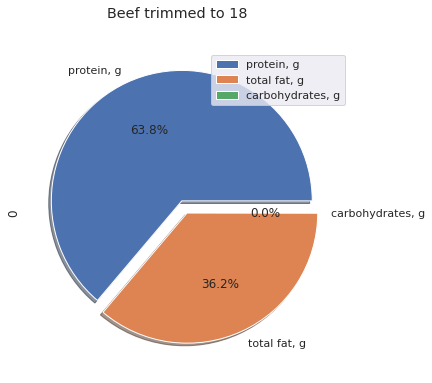

In [ ]:
b_18 = {'protein, g': [20.6145], 'total fat, g': [11.6800], 'carbohydrates, g': [0.0075]}
df_mean_18 = pd.DataFrame(data=b_18)
df_mean_18
plot = df_mean_18.T.plot.pie(subplots=True, figsize=(11, 6), title = 'Beef trimmed to 18', autopct='%1.1f%%', explode=(0.1, 0, 0),
                   shadow=True, startangle=0)

# среднее содержание белка, жира, углеводов по категории "говядина, обваленная до 18 жирности"

In [ ]:
# проделаем аналогичные операции для категории "говядина, обваленная до 0 жира"

df['Beef_0'] = df['product'].str.contains('Beef raw all grades trimmed to 0 fat')
top_20_beef_raw_0 = df.loc[df['Beef_0']].sort_values('kilocal', ascending=False).head(10)
fig = px.bar(top_20_beef_raw_0, x='protein, g', y='product', color='total fat, g', title='Beef trimmed to 0 products', orientation = 'h')
fig.show()

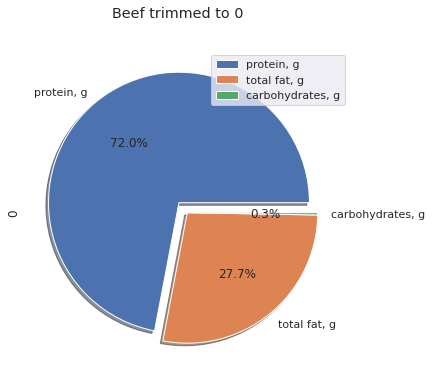

In [ ]:
df_beef_0 = df.loc[df['Beef_0']]
df_beef_0 = df_beef_0[['protein, g', 'total fat, g', 'carbohydrates, g']]
df_beef_0.mean()
b_0 = {'protein, g': [20.9739], 'total fat, g': [8.0746], 'carbohydrates, g': [0.0812]}
df_mean_0 = pd.DataFrame(data=b_0)
df_mean_0
plot = df_mean_0.T.plot.pie(subplots=True, figsize=(11, 6), title = 'Beef trimmed to 0', autopct='%1.1f%%', explode=(0.1, 0, 0),
                   shadow=True, startangle=0)

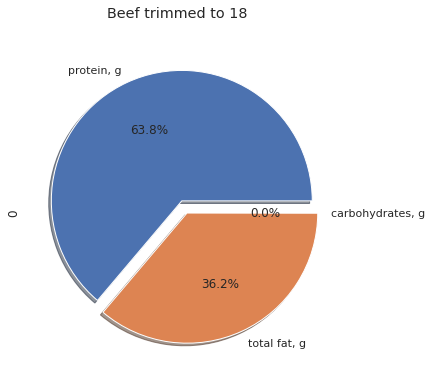

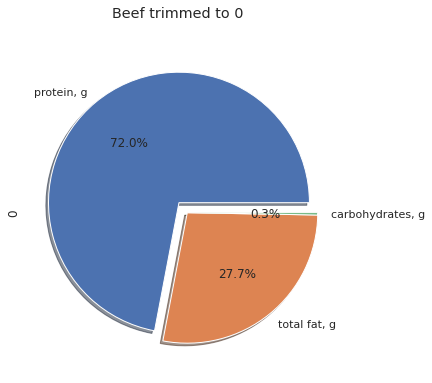

In [ ]:
# сравним составы между собой

df_mean_18.T.plot.pie(subplots=True, figsize=(11, 6), title = 'Beef trimmed to 18', autopct='%1.1f%%', explode=(0.1, 0, 0),
                   shadow=True, startangle=0, legend=False)
df_mean_0.T.plot.pie(subplots=True, figsize=(11, 6), title = 'Beef trimmed to 0', autopct='%1.1f%%', explode=(0.1, 0, 0),
                   shadow=True, startangle=0, legend=False)
plt.show()

In [ ]:
# сравним состав приготовленных продуктов из ягнятины

df['Lamb_cooked'] = df['product'].str.contains('Lamb cooked')
lamb_cooked = df.loc[df['Lamb_cooked']].sort_values('kilocal', ascending=False)
fig = px.bar(lamb_cooked, x='total fat, g', y='product', color='protein, g', title='Lamb cooked products', orientation = 'h')
fig.show()

In [ ]:
# сравним состав продуктов из КФС, приготовленных по разным рецептурам из разных частей курицы

df['KFC'] = df['product'].str.contains('KFC skin')
KFC = df.loc[df['KFC']].sort_values('kilocal', ascending=False)
fig = px.bar(KFC, x='protein, g', y='product', color='total fat, g', title='KFC chicken parts', orientation='h')
fig.show()